In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Color import *

# Matplotlib font configuration
from MatplotlibFonts import *

# Change the font size
rcParams.update({"font.size": 11})

In [3]:
RESULT_DIR='../benchmarks/results-powertrace'

In [4]:
# Benchmarks in order
Benchmarks = [
    'coremark',
    'sha',
    'crc',
    'aes',
    'dijkstra',
    'picojpeg'
]

In [5]:
df = {}

Names=['on-time', 'stdev', 'cycles', 'power-failures']
def load_benchmark(bench):
    file = RESULT_DIR + '/' + bench + '/powertrace-stats.csv'
    print('Loading file: ' + file)
    return pd.read_csv(file, names=Names)

for bench in Benchmarks:
    df[bench] = load_benchmark(bench).groupby('on-time').mean()
    df[bench]['exec'] = df[bench]['cycles'] / df[bench].loc[0]['cycles']
    df[bench] = df[bench].reset_index()

     

Loading file: ../benchmarks/results-powertrace/coremark/powertrace-stats.csv
Loading file: ../benchmarks/results-powertrace/sha/powertrace-stats.csv
Loading file: ../benchmarks/results-powertrace/crc/powertrace-stats.csv
Loading file: ../benchmarks/results-powertrace/aes/powertrace-stats.csv
Loading file: ../benchmarks/results-powertrace/dijkstra/powertrace-stats.csv
Loading file: ../benchmarks/results-powertrace/picojpeg/powertrace-stats.csv


In [40]:
df['coremark']

,on-time,stdev,cycles,power-failures,exec
0,0,1000.0,6270699.0,0.0,1.000000
1,50000,1000.0,6295037.0,125.0,1.003881
2,100000,1000.0,6294592.0,62.0,1.003810
3,200000,1000.0,6274351.0,31.0,1.000582
4,500000,1000.0,6272258.0,12.0,1.000249
5,1000000,1000.0,6272027.0,6.0,1.000212
6,2000000,1000.0,6271616.0,3.0,1.000146
7,5000000,1000.0,6270798.0,1.0,1.000016
8,10000000,1000.0,6270699.0,0.0,1.000000
9,20000000,1000.0,6270699.0,0.0,1.000000


In [95]:
# Create the latex table holding all the info
OnTimes = [
#    0, # Cont
    50000000,
    10000000,
    5000000,
    1000000,
    500000,
    100000,
    50000,
]
OnTimes.reverse()

tex=''
def tex_addl(t):
    global tex
    tex += t + '\n'
    
def tex_add(t):
    global tex
    tex += t
    
# Add a group to change the table spacing
tex_addl(r'% table automatically generated by PowertracePlot.ipynb')
#tex_addl(r'\begingroup')
#tex_addl(r'\setlength{\tabcolsep}{4pt} % Default value: 6pt')

# Begin the table
#tex_addl(r'\begin{table*}[]')
#tex_addl(r'\centering')
#tex_addl(r'\small')
tex_addl(r'\begin{tabular}{@{}lllrrrrrrrrrrrr@{}}')
tex_addl(r'\toprule')

# Add the benchmark headers
tex_add(r'\multicolumn{3}{l}{}')
for bench in Benchmarks:
    tex_add(r' & \multicolumn{2}{c}{\textbf{'+bench+'}}')
tex_addl(r' \\ \midrule')

# Add the power-fail header
tex_add(r'\textbf{on-cycles} & \textbf{@8MHz} & \multicolumn{1}{l|}{\textbf{@50MHz}}')
for bench in Benchmarks:
    tex_add(r' & \textbf{overh} & \textbf{pfail}')
tex_addl(r' \\')

# Add the actual numbers
for ontime in OnTimes:
    if ontime == 0:
        tex_add(r'\textit{continuous}')
        tex_add(r' & ')
        tex_add(r' & \multicolumn{1}{l|}{} ')
    else:
        tex_add('$'+str(ontime)+'$')
        on_8MHz = ontime/8000
        if on_8MHz >= 100.0:
            on_8MHz = '${:.0f}'.format(ontime/8000) + r'\mskip\thinmuskip$ms'
        else:
            on_8MHz = '${:.1f}'.format(ontime/8000) + r'\mskip\thinmuskip$ms'
        on_50MHz = '${:.0f}'.format(ontime/50000) + r'\mskip\thinmuskip$ms'
        tex_add(r' & '+on_8MHz)
        tex_add(r' & \multicolumn{1}{l|}{'+on_50MHz+'} ')
            
    for bench in Benchmarks:
        exec_val = df[bench].set_index('on-time').loc[ontime]['exec']
        pf_val = df[bench].set_index('on-time').loc[ontime]['power-failures']
        
        exec_val = (exec_val-1)*100
        
        exec_str = '{:.2f}'.format(exec_val)
        tex_add(r' & '+exec_str+'\%')
        tex_add(r' & '+str(int(pf_val)))
    tex_addl(r' \\')
tex_addl(r' \bottomrule')

# End the table
tex_addl(r'\end{tabular}')
#tex_addl(r'\end{table*}')

# End the group
#tex_addl(r'\endgroup')

print(tex)

# Save the table
with open('plots/powertrace-table.tex', "w") as f:
    # Writing data to a file
    f.write(tex)

% table automatically generated by PowertracePlot.ipynb
\begin{tabular}{@{}lllrrrrrrrrrrrr@{}}
\toprule
\multicolumn{3}{l}{} & \multicolumn{2}{c}{\textbf{coremark}} & \multicolumn{2}{c}{\textbf{sha}} & \multicolumn{2}{c}{\textbf{crc}} & \multicolumn{2}{c}{\textbf{aes}} & \multicolumn{2}{c}{\textbf{dijkstra}} & \multicolumn{2}{c}{\textbf{picojpeg}} \\ \midrule
\textbf{on-cycles} & \textbf{@8MHz} & \multicolumn{1}{l|}{\textbf{@50MHz}} & \textbf{overh} & \textbf{pfail} & \textbf{overh} & \textbf{pfail} & \textbf{overh} & \textbf{pfail} & \textbf{overh} & \textbf{pfail} & \textbf{overh} & \textbf{pfail} & \textbf{overh} & \textbf{pfail} \\
$50000$ & $6.2\mskip\thinmuskip$ms & \multicolumn{1}{l|}{$1\mskip\thinmuskip$ms}  & 0.39\% & 125 & 2.87\% & 380 & 7.26\% & 1 & 0.29\% & 7 & 1.70\% & 1135 & 0.17\% & 2924 \\
$100000$ & $12.5\mskip\thinmuskip$ms & \multicolumn{1}{l|}{$2\mskip\thinmuskip$ms}  & 0.38\% & 62 & 2.87\% & 190 & 0.00\% & 0 & 0.08\% & 3 & 0.86\% & 563 & 0.09\% & 1461 \\
$500000$ &

In [72]:
xlabel_div = 1000

xlabels = [str(int(x/xlabel_div)) for x in df['crc']['on-time']][1:]
xticks = list(range(0,len(xlabels),1))
#df['crc']['cycles'].plot(x=xlabels)
print('Labels:', xlabels)
print('Xticks:', xticks)

Labels: ['50', '100', '200', '500', '1000', '2000', '5000', '10000', '20000', '50000']
Xticks: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0, 0.5, 'power-failures')

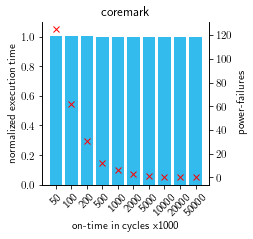

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))

#for bench in Benchmarks:
#    data = list(df[bench]['exec'][1:])
#    ax.plot(xticks, data)

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
plt.xticks(rotation=45)

ax2 = ax.twinx()

data = list(df['coremark']['exec'][1:])
powerfail = list(df['coremark']['power-failures'][1:])
ax.bar(xticks, data, 0.8, color=Color['cyan'])
ax2.plot(xticks, powerfail, linestyle='', marker='x', color='red')

ax.set_ylim(0, 1.1)

#ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.set_title('coremark')
ax.set_xlabel('on-time in cycles x'+str(xlabel_div))
ax.set_ylabel('normalized execution time')
ax2.set_ylabel('power-failures')

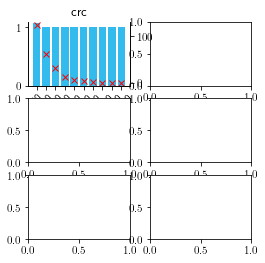

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(4,4))


def plot_bench(bench, x, y):
    ax = axs[x,y]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, rotation=45)

    ax2 = ax.twinx()

    data = list(df['crc']['exec'][1:])
    powerfail = list(df['coremark']['power-failures'][1:])
    ax.bar(xticks, data, 0.8, color=Color['cyan'])
    ax2.plot(xticks, powerfail, linestyle='', marker='x', color='red')

    ax.set_ylim(0, 1.1)

    #ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)


    ax.set_title('crc')

    
plot_bench('crc', 0, 0)

#ax.set_xlabel('on-time in cycles x'+str(xlabel_div))
#ax.set_ylabel('normalized execution time')
#ax2.set_ylabel('power-failures')